In [1]:
import jax.numpy as jnp

import pandas as pd

import make_df

import matplotlib.pyplot as plt

In [2]:
def fun(x):
    return (x[:,0]**2 + x[:,1] - 11)**2 / 800.0 + (x[:,0] + x[:,1]**2 -7)**2 / 800.0

In [3]:
# sparsification
sparse = True
subset_size = 0.1

if sparse:
    # directory where to save stuff
    # in_dir = "./sparse"
    in_dir = "./sparse/even"
    # How many derivative observations should be chosen
    list_d_vals = [200, 400, 800, 1500, 2000]
    # list_d_vals = [50, 100, 200, 400, 800, 1500, 2000]
    # optimizer type
    optimizers = ["L-BFGS-B", "TNC", "SLSQP"]
else:
    # directory where to save stuff
    in_dir = "./full"
    # How many derivative observations should be chosen
    list_d_vals = [5, 20, 50, 100, 200, 400, 800, 1500, 2000]
    # optimizer type
    optimizers = ["L-BFGS-B", "SLSQP"]

# name of the function
name = "him"

# How many function observations should be chosen
list_f_vals = [1, 5, 20, 50]
# list_f_vals = [0,]

# optimizer type
iters_per_optimmizer = 10

# Grid on which to evaluate the function
bounds = jnp.array([[-5.0, -5.0], [5.0, 5.0]])
eval_grid = jnp.linspace(bounds[0], bounds[1],100).T
eval_grid = jnp.array(jnp.meshgrid(*eval_grid)).reshape(2,-1).T

In [4]:
data = make_df.make_df(list_f_vals, list_d_vals, optimizers, in_dir, name, sparse, subset_size, fun, eval_grid)
# data = make_df.make_df_all(list_d_vals, optimizers, in_dir, name, sparse, subset_size, fun, eval_grid)

In [5]:
data.head(5)

,f,d,opt,mses,maxerrs,maxstds,true_in_confs,mean_mse,max_mse,min_mse,mean_tic,max_tic,min_tic
0,1,200,L-BFGS-B,"[0.008387562, 0.005305541, 0.06042664, 0.08562...","[0.31951296, 0.27512813, 0.365365, 0.6228678, ...","[nan, nan, nan, nan, nan, nan, 0.14368564, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4098, 0.0401,...",0.034575738,0.10108956,0.005305541,0.04499,0.4098,0.0
1,1,200,TNC,"[0.029432567, 402.70877, 0.015960418, 0.026033...","[0.5293457, 48.7, 0.2503174, 0.2145425, 0.4644...","[nan, nan, nan, nan, 0.15600118, nan, 3.004216...","[0.0, 0.0, 0.0, 0.0, 0.0379, 0.0, 1.0, 0.0, 0....",40.296333,402.70877,0.0021324058,0.20226999,1.0,0.0
2,1,200,SLSQP,"[0.05251076, 0.041210987, 0.038452215, 0.00305...","[1.1125, 0.3732272, 0.45219725, 0.17131704, 0....","[0.03162278, nan, nan, nan, nan, 0.14974265, 0...","[0.114199996, 0.0, 0.0, 0.0, 0.0, 0.6468, 0.52...",0.033138487,0.10358104,0.0030132898,0.14815,0.6468,0.0
3,1,400,L-BFGS-B,"[0.002773494, 0.16829945, 0.018270642, 0.05251...","[0.1582231, 0.98223615, 0.38369143, 1.1125, 0....","[nan, nan, nan, 0.03162278, nan, nan, nan, nan...","[0.0, 0.0, 0.0, 0.114199996, 0.0, 0.0, 0.0, 0....",0.037074577,0.16829945,0.002773494,0.011419999,0.114199996,0.0
4,1,400,TNC,"[0.06274977, 0.04735783, 0.011313985, 0.294157...","[0.51518166, 0.48783678, 0.19526362, 0.7809492...","[nan, nan, nan, 0.08998523, nan, nan, nan, nan...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.050765205,0.2941575,0.0027734805,0.0,0.0,0.0


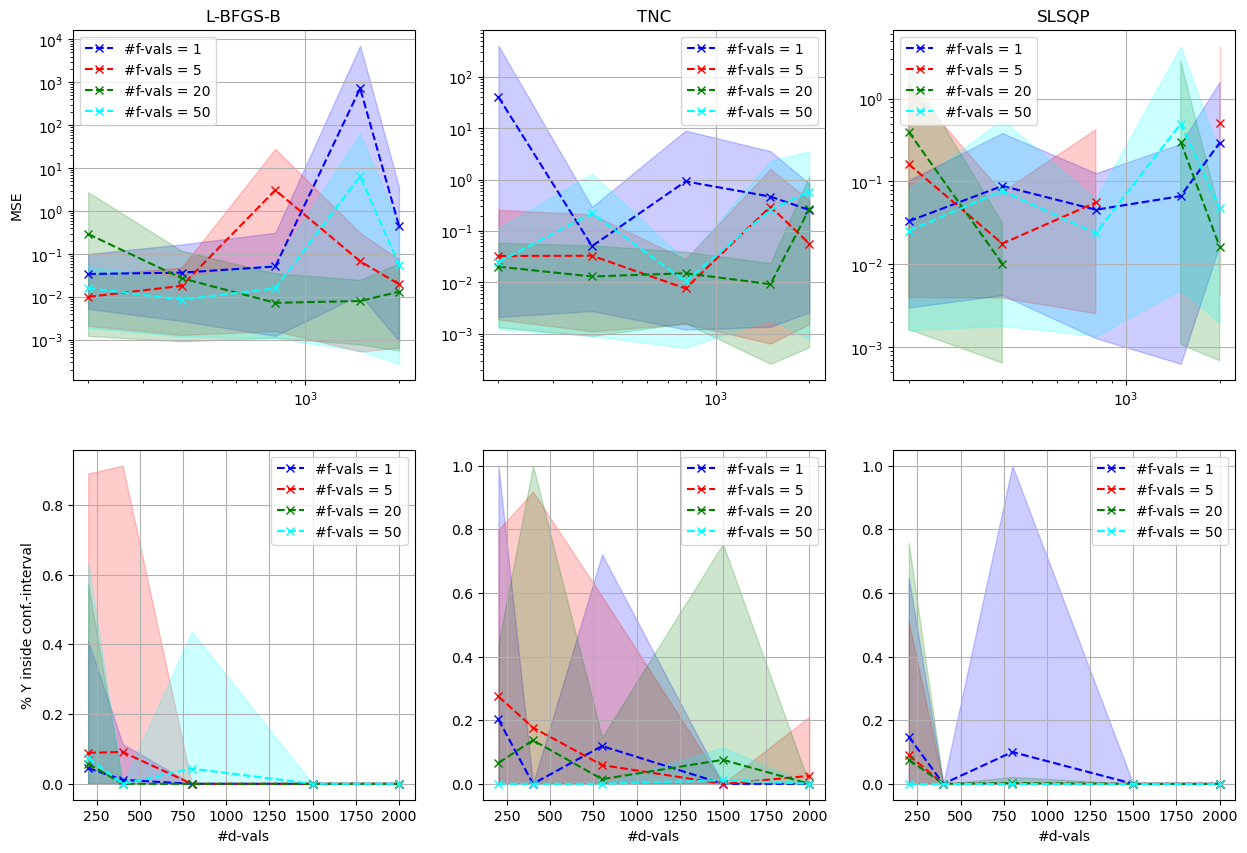

In [6]:
colors = ["b", "r", "g", "cyan"]

if sparse:
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))
else:
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i, optimizer in enumerate(optimizers):
    opt_data = data[data["opt"] == optimizer]
    for c,f in zip(colors, opt_data["f"].unique()):
        temp = opt_data[opt_data["f"] == f]
        dvals = temp["d"]

        mean_mse = temp["mean_mse"]
        min_mse = temp["min_mse"]
        max_mse = temp["max_mse"]
        ax[0,i].plot(dvals, mean_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[0,i].fill_between(dvals, min_mse.tolist(), max_mse.tolist(), color=c, alpha=0.2)
        ax[0,i].set_yscale("log")
        ax[0,i].set_xscale("log")

        mean_tic = temp["mean_tic"]
        min_tic = temp["min_tic"]
        max_tic = temp["max_tic"]
        ax[1,i].plot(dvals, mean_tic, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[1,i].fill_between(dvals, min_tic.tolist(), max_tic.tolist(), color=c, alpha=0.2)


    ax[0,i].grid()
    ax[1,i].grid()
    ax[0,i].legend()
    ax[1,i].legend()
    ax[1,i].set_xlabel("#d-vals")
    ax[0,0].set_ylabel("MSE")
    ax[1,0].set_ylabel("% Y inside conf.-interval")
    ax[0,i].set_title(optimizer)

In [7]:
# colors = ["b", "r", "g", "cyan"]

# if sparse:
#     fig, ax = plt.subplots(2, 3, figsize=(15, 10))
# else:
#     fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# for i, optimizer in enumerate(optimizers):
#     opt_data = data[data["opt"] == optimizer]
#     vals = opt_data["f"]

#     mean_mse = opt_data["mean_mse"]
#     print(mean_mse)
#     min_mse = opt_data["min_mse"]
#     max_mse = opt_data["max_mse"]
#     ax[0,i].plot(vals, mean_mse, ls="--", marker="x")
#     ax[0,i].fill_between(vals, min_mse.tolist(), max_mse.tolist(), alpha=0.2)
#     ax[0,i].set_yscale("log")
#     # ax[0,i].set_xscale("log")

#     mean_tic = opt_data["mean_tic"]
#     min_tic = opt_data["min_tic"]
#     max_tic = opt_data["max_tic"]
#     ax[1,i].plot(vals, mean_tic, ls="--", marker="x")
#     ax[1,i].fill_between(vals, min_tic.tolist(), max_tic.tolist(), alpha=0.2)


#     ax[0,i].grid()
#     ax[1,i].grid()
#     ax[1,i].set_xlabel("#d-vals")
#     ax[0,0].set_ylabel("MSE")
#     ax[1,0].set_ylabel("% Y inside conf.-interval")
#     ax[0,i].set_title(optimizer)